In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Customer data.csv')

EDA
---

In [3]:
df.head()

,Unnamed: 0,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,0,100000001,Male,Single,90.0,University,124670.0,Skilled employee/Official,Big city
1,1,100000002,Female,Non-single,22.0,High school,150773.0,Skilled employee/Official,Big city
2,2,100000003,Male,Single,49.0,High school,89210.0,Unemployed,Small city
3,3,100000004,Male,Single,45.0,High school,171565.0,Skilled employee/Official,Mid-sized city
4,4,100000005,Male,Sinle,53.0,High school,149031.0,Skilled employee/Official,Mid-sized city


When we look at data.head() we see that there is some wrong spelled words so we have to take a look if there are others and fix them

In [4]:
# 'ID' and 'Unnamed: 0' columns both just show us the indexes of elements so we can drop them
df = df.drop('Unnamed: 0', axis=1)
df = df.drop('ID', axis=1)
df.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,Male,Single,90.0,University,124670.0,Skilled employee/Official,Big city
1,Female,Non-single,22.0,High school,150773.0,Skilled employee/Official,Big city
2,Male,Single,49.0,High school,89210.0,Unemployed,Small city
3,Male,Single,45.0,High school,171565.0,Skilled employee/Official,Mid-sized city
4,Male,Sinle,53.0,High school,149031.0,Skilled employee/Official,Mid-sized city


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Sex              2000 non-null   object 
 1   Marital status   1981 non-null   object 
 2   Age              1933 non-null   float64
 3   Education        1964 non-null   object 
 4   Income           1727 non-null   float64
 5   Occupation       1988 non-null   object 
 6   Settlement size  1987 non-null   object 
dtypes: float64(2), object(5)
memory usage: 109.5+ KB


As we see we we have to have 2000 data in each column. But in Martial status, Age, Education, Income, Occupation, Settlement size there have some incompleteness. We are gonna look at these data

In [6]:
df.isnull().sum()

Sex                  0
Marital status      19
Age                 67
Education           36
Income             273
Occupation          12
Settlement size     13
dtype: int64

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Occupation'),
  Text(1, 0, 'Settlement size'),
  Text(2, 0, 'Marital status'),
  Text(3, 0, 'Education'),
  Text(4, 0, 'Age'),
  Text(5, 0, 'Income')])

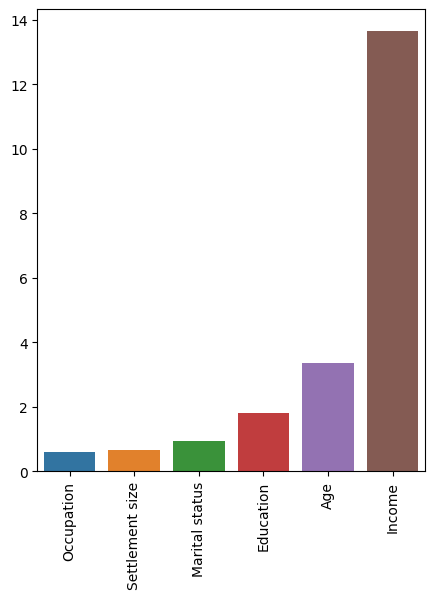

In [7]:
def percent_missing(df):
    percent_nan = 100* df.isnull().sum() / len(df)
    percent_nan = percent_nan[percent_nan>0].sort_values()
    return percent_nan
percent_nan = percent_missing(df)
plt.figure(figsize=(5,6))
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90)

In [8]:
df.describe()

,Age,Income
count,1933.000000,1727.000000
mean,36.142783,120427.197452
std,14.873772,39599.986638
min,2.000000,8987.000000
25%,27.000000,97306.500000
50%,33.000000,115393.000000
75%,42.000000,137404.500000
max,433.000000,484719.000000


<Axes: xlabel='Age', ylabel='Income'>

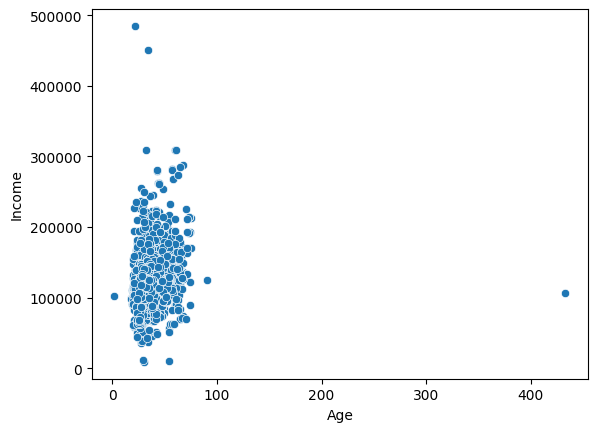

In [9]:
plt.figure(dpi=100)
sns.scatterplot(x=df['Age'], y=df['Income'], data=df)

In [10]:
categorical_columns = ['Marital status', 'Education', 'Occupation', 'Settlement size']
for i in categorical_columns:
    print(f'{i}: {df[i].unique()}')

Marital status: ['Single' 'Non-single' 'Sinle' 'Married' nan 'Non-singl']
Education: ['University' 'High school' 'Unknown' nan 'Graduate school']
Occupation: ['Skilled employee/Official' 'Unemployed'
 'Management/High qualified employee' nan]
Settlement size: ['Big city' 'Small city' 'Mid-sized city' 'Medium sized city' nan
 'Mid sized city' 'Megapolis' 'Little town']


Preprocessing
---

### Fixing invalid values

In [11]:
# Changeing sinle -> single, Non-singl -> Non-single
df['Marital status'] = df['Marital status'].replace('Sinle', 'Single')
df['Marital status'] = df['Marital status'].replace('Non-singl', 'Non-single')
df['Marital status'].unique()

array(['Single', 'Non-single', 'Married', nan], dtype=object)

In [12]:
# we can consider 'Megapolis' and 'Big city' as same
# 'Medium sized city' and 'Mid sized city' and 'Mid-sized city' as same
# 'Small city' and 'Little town' as same
df['Settlement size'] = df['Settlement size'].replace({'Medium sized city': 'Mid-sized city',
                                                       'Mid sized city': 'Mid-sized city',
                                                       'Megapolis': 'Big city',
                                                       'Little town': 'Small city'})
df['Settlement size'].unique()

array(['Big city', 'Small city', 'Mid-sized city', nan], dtype=object)

### Null values and outliers cleaning

In [13]:
df.isnull().sum()

Sex                  0
Marital status      19
Age                 67
Education           36
Income             273
Occupation          12
Settlement size     13
dtype: int64

In [14]:
# filter for float values of age column
df[(df['Age'] % 1 != 0) & ~df['Age'].isnull()]

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size


#### Occupation

In [15]:
df['Occupation'].value_counts()

Skilled employee/Official             1110
Unemployed                             626
Management/High qualified employee     252
Name: Occupation, dtype: int64

In [16]:
df[df['Occupation'].isnull()]

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
249,Female,Non-single,NaN,High school,88800.0,NaN,Big city
602,Female,Non-single,34.0,High school,90852.0,NaN,Small city
778,Male,Single,38.0,High school,215639.0,NaN,Mid-sized city
953,Female,Non-single,NaN,High school,223185.0,NaN,Mid-sized city
1128,Male,Single,49.0,High school,178549.0,NaN,Big city
1334,Female,Married,22.0,High school,85974.0,NaN,Small city
1479,Female,Single,25.0,High school,85569.0,NaN,Small city
1601,Male,Single,23.0,Unknown,107961.0,NaN,Small city
1671,Female,Non-single,27.0,High school,85294.0,NaN,Small city
1692,Female,Single,38.0,High school,81014.0,NaN,Small city


In [17]:
df[(df["Income"]>88800.0) & 
   (df["Income"]<150000.0)& 
   (df["Age"]>25.0) & (df["Age"]<35.0)& 
   (df["Education"]=='High school')]["Occupation"].value_counts()

Skilled employee/Official             235
Unemployed                             44
Management/High qualified employee     22
Name: Occupation, dtype: int64

In [18]:
# By taking consideration of education, age and income most frequent values of occupation is Skilled employee/Official 
# so I am gonna fill null values of 'Occupation' with 'Skilled employee/Official'
df['Occupation'].fillna('Skilled employee/Official', inplace=True)
df['Occupation'].isnull().sum()

0

#### Settlement size

In [19]:
df[df['Settlement size'].isnull()]

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
33,Male,Single,57.0,University,NaN,Unemployed,NaN
328,Male,Single,31.0,Unknown,145670.0,Skilled employee/Official,NaN
454,Male,Single,31.0,Unknown,130973.0,Skilled employee/Official,NaN
521,Female,Non-single,24.0,High school,116863.0,Skilled employee/Official,NaN
622,Male,Non-single,38.0,High school,NaN,Skilled employee/Official,NaN
1172,Male,Single,38.0,High school,NaN,Unemployed,NaN
1365,Female,Non-single,27.0,High school,122649.0,Skilled employee/Official,NaN
1445,Female,Single,46.0,University,104751.0,Unemployed,NaN
1459,Female,Single,52.0,University,NaN,Unemployed,NaN
1487,Female,Non-single,21.0,High school,90656.0,Skilled employee/Official,NaN


In [20]:
df['Settlement size'].value_counts()

Small city        939
Mid-sized city    594
Big city          454
Name: Settlement size, dtype: int64

In [21]:
# I am gonna fill "Settlement size" null values with most frequent value: 'Small city' because the null values only 13 out of 2000
df['Settlement size'].fillna('Small city', inplace=True)
df['Settlement size'].isnull().sum()

0

#### Marital status

In [22]:
df['Marital status'].value_counts()

Single        1000
Non-single     903
Married         78
Name: Marital status, dtype: int64

In [23]:
df[df['Marital status'].isnull()]

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
227,Male,NaN,53.0,High school,207783.0,Management/High qualified employee,Mid-sized city
319,Female,NaN,27.0,High school,93605.0,Unemployed,Small city
339,Male,NaN,31.0,High school,81394.0,Unemployed,Small city
531,Female,NaN,28.0,NaN,137188.0,Skilled employee/Official,Mid-sized city
590,Female,NaN,58.0,University,NaN,Unemployed,Small city
624,Male,NaN,65.0,University,136812.0,Skilled employee/Official,Mid-sized city
699,Male,NaN,40.0,High school,158197.0,Management/High qualified employee,Mid-sized city
852,Male,NaN,NaN,High school,102042.0,Skilled employee/Official,Small city
1258,Male,NaN,26.0,High school,94650.0,Unemployed,Big city
1274,Male,NaN,48.0,High school,155708.0,Skilled employee/Official,Mid-sized city


In [24]:
df[(df["Income"]>100000.0) & 
   (df["Income"]<200000.0)& 
   (df["Age"]>26.0)& (df["Age"]<60.0) &
   ((df["Education"]=='High school')|(df["Education"]=='University')) &
   ((df["Settlement size"]=='Mid-sized city')|(df["Settlement size"]=='Small city'))
   ]["Marital status"].value_counts()

Single        254
Non-single    233
Married        22
Name: Marital status, dtype: int64

In [25]:
# Most frequent values of 'Marital status' is 'Single' based on other conditions
# so I am gonna fill null values of 'Marital status' with 'Single'
df['Marital status'].fillna('Single', inplace=True)
df['Marital status'].isnull().sum()

0

#### Education

In [26]:
df['Education'].value_counts()

High school        1358
University          288
Unknown             282
Graduate school      36
Name: Education, dtype: int64

In [27]:
# Because we have already high value of Unknown values so I am gonna fill null values to Unknown too
df['Education'].fillna('Unknown', inplace=True)
df['Education'].isnull().sum()

0

In [28]:
# lets again look at how much of null values left 
df.isnull().sum()
# We have finished handling null values non-numeric data columns  

Sex                  0
Marital status       0
Age                 67
Education            0
Income             273
Occupation           0
Settlement size      0
dtype: int64

But also we have to handle Uknown values too for better predictions

In [29]:
for i in df['Education'].unique():
    age = df[df['Education'] == i]['Age'].mean()
    income = df[df['Education'] == i]['Income'].mean()
    print(f'{i} average AGE: {age}INCOME: {income}')

University average AGE: 54.08243727598566INCOME: 144574.3151260504
High school average AGE: 33.66590038314176INCOME: 116201.83277027027
Unknown average AGE: 28.079872204472842INCOME: 115240.26277372263
Graduate school average AGE: 57.0INCOME: 142267.12903225806


In [30]:
# As we see in 'High school' the average age and income is closer to 'Unknown' data 
# so we going to change 'Unknown' to 'High school' 
df['Education'] = df['Education'].replace('Unknown', 'High school')
df['Education'].value_counts()

High school        1676
University          288
Graduate school      36
Name: Education, dtype: int64

#### Outliers and Null values of **Age**

In [31]:
df.describe()

,Age,Income
count,1933.000000,1727.000000
mean,36.142783,120427.197452
std,14.873772,39599.986638
min,2.000000,8987.000000
25%,27.000000,97306.500000
50%,33.000000,115393.000000
75%,42.000000,137404.500000
max,433.000000,484719.000000


As we see there are really big values in age and income we have to look for some outliers first then clean null values.
Because these ouliers may affect our mean values

<Axes: >

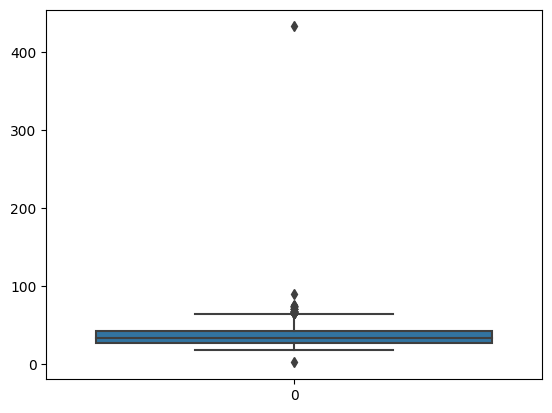

In [32]:
sns.boxplot(df['Age'])

In [33]:
df[(df['Age'] < 18) | (df['Age'] > 90)]

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
545,Male,Single,433.0,High school,107099.0,Skilled employee/Official,Mid-sized city
679,Female,Non-single,2.0,High school,101783.0,Skilled employee/Official,Big city


As we see there is 2 data points that are far away from actual data points
We can drop these data because it it just 2 and will not have a large affect to the original data and our model's prediciton

<Axes: >

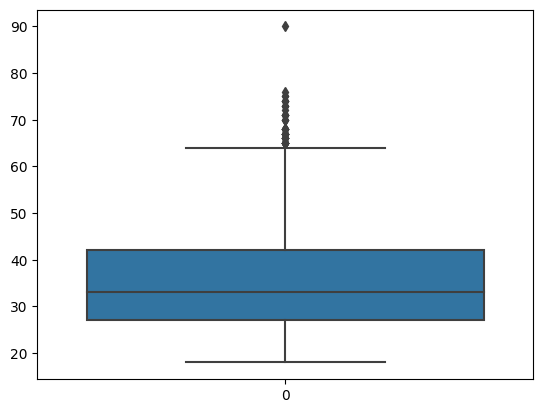

In [34]:
df = df.drop(df[(df['Age'] < 18) | (df['Age'] > 90)].index, axis=0)
sns.boxplot(df['Age'])

In [35]:
df[df['Age']==90]

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,Male,Single,90.0,University,124670.0,Skilled employee/Official,Big city


In [36]:
df = df.drop(df[df['Age']==90].index, axis=0)

In [37]:
df.reset_index(drop=True, inplace=True)
df.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,Female,Non-single,22.0,High school,150773.0,Skilled employee/Official,Big city
1,Male,Single,49.0,High school,89210.0,Unemployed,Small city
2,Male,Single,45.0,High school,171565.0,Skilled employee/Official,Mid-sized city
3,Male,Single,53.0,High school,149031.0,Skilled employee/Official,Mid-sized city
4,Male,Single,35.0,High school,NaN,Unemployed,Small city


<Axes: >

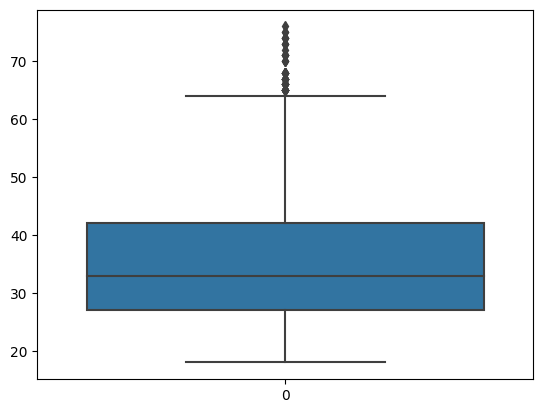

In [38]:
sns.boxplot(df['Age'])

The rest of the outliers just replaced with the upper limit of the boxplot. For finding this we use the Inter Quantile Range(IQR)

In [39]:
# Calculate the first quartile (Q1) and third quartile (Q3)
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Calculate the lower and upper limits
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

print(f"Lower Limit: {lower_limit}")
print(f"Upper Limit: {upper_limit}")

Lower Limit: 4.5
Upper Limit: 64.5


/var/folders/_z/99p72p7n1ll_9zr8ywr94hzr0000gn/T/ipykernel_11845/431726892.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age'].loc[df[df['Age'] > upper_limit].index] = 64


<Axes: >

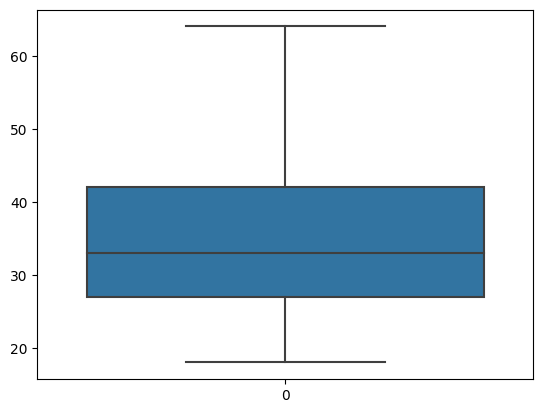

In [40]:
df['Age'].loc[df[df['Age'] > upper_limit].index] = 64
sns.boxplot(df['Age'])

We handle all outliers now we can look at nan values

In [41]:
df['Age'].isnull().sum()

67

In [42]:
df['Age'].describe()

count    1930.000000
mean       35.800000
std        11.390901
min        18.000000
25%        27.000000
50%        33.000000
75%        42.000000
max        64.000000
Name: Age, dtype: float64

In [43]:
# i am gonna fill null values with the mean value
df['Age'].fillna(36, inplace=True)
df['Age'].isnull().sum()

0

#### Outliers and Null values of **Income**

<Axes: >

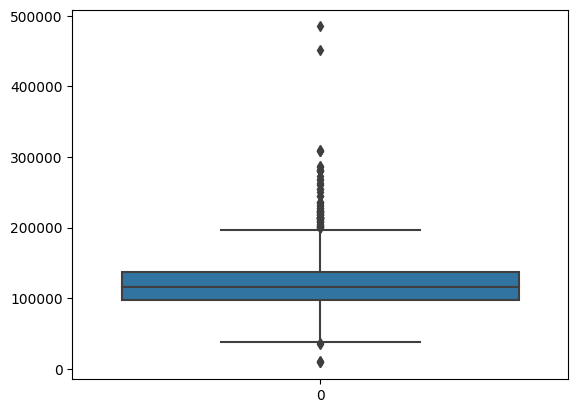

In [44]:
sns.boxplot(df['Income'])

In [45]:
# Firs we calculate the upper and lower limit 
# Calculate the first quartile (Q1) and third quartile (Q3)
Q1 = df['Income'].quantile(0.25)
Q3 = df['Income'].quantile(0.75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Calculate the lower and upper limits
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

print(f"Lower Limit: {lower_limit}")
print(f"Upper Limit: {upper_limit}")

Lower Limit: 37013.625
Upper Limit: 197782.625


In [46]:
df[(df['Income'] < 30000.0) | (df['Income'] > 310000)]

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
740,Male,Single,22.0,High school,484719.0,Skilled employee/Official,Big city
964,Female,Non-single,54.0,University,9875.0,Management/High qualified employee,Big city
1424,Female,Non-single,30.0,High school,8987.0,Skilled employee/Official,Mid-sized city
1472,Female,Non-single,34.0,High school,450747.0,Skilled employee/Official,Mid-sized city
1876,Male,Single,29.0,High school,11042.0,Skilled employee/Official,Small city


9875.0, 8987.0, 11042.0 -> these values are too small for manager and skilled employee so we will drop them too

<Axes: >

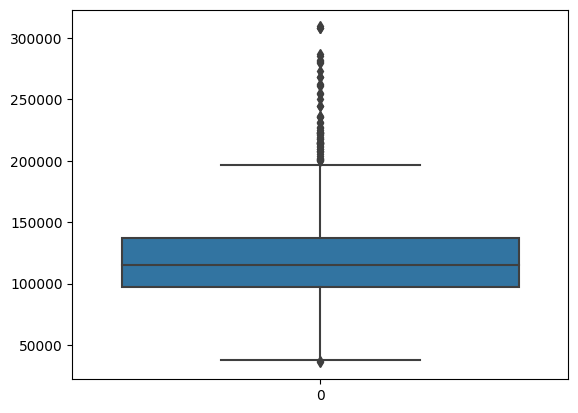

In [47]:
# while they are so far away from limits and only 5 we can drop them 
df = df.drop(df[(df['Income'] < 30000) | (df['Income'] > 310000)].index, axis=0).reset_index(drop=True)
sns.boxplot(df['Income'])

The rest of the outliers will be ignored. Because depending on the company there can be some big values of income. 
We didn't ignore the age outliers because there are a retier age and people that are greater than that age connot work. So we have to handle that part.

We handle all outliers now we can look at nan values

In [48]:
df['Income'].isnull().sum()

273

In [49]:
df['Income'].describe()

count      1719.000000
mean     120232.023269
std       37590.465862
min       35832.000000
25%       97341.500000
50%      115403.000000
75%      137404.500000
max      309364.000000
Name: Income, dtype: float64

In [50]:
# The null values of Income will be filled with the mean value
df['Income'].fillna(120232.0, inplace=True)
df['Income'].isnull().sum()

0

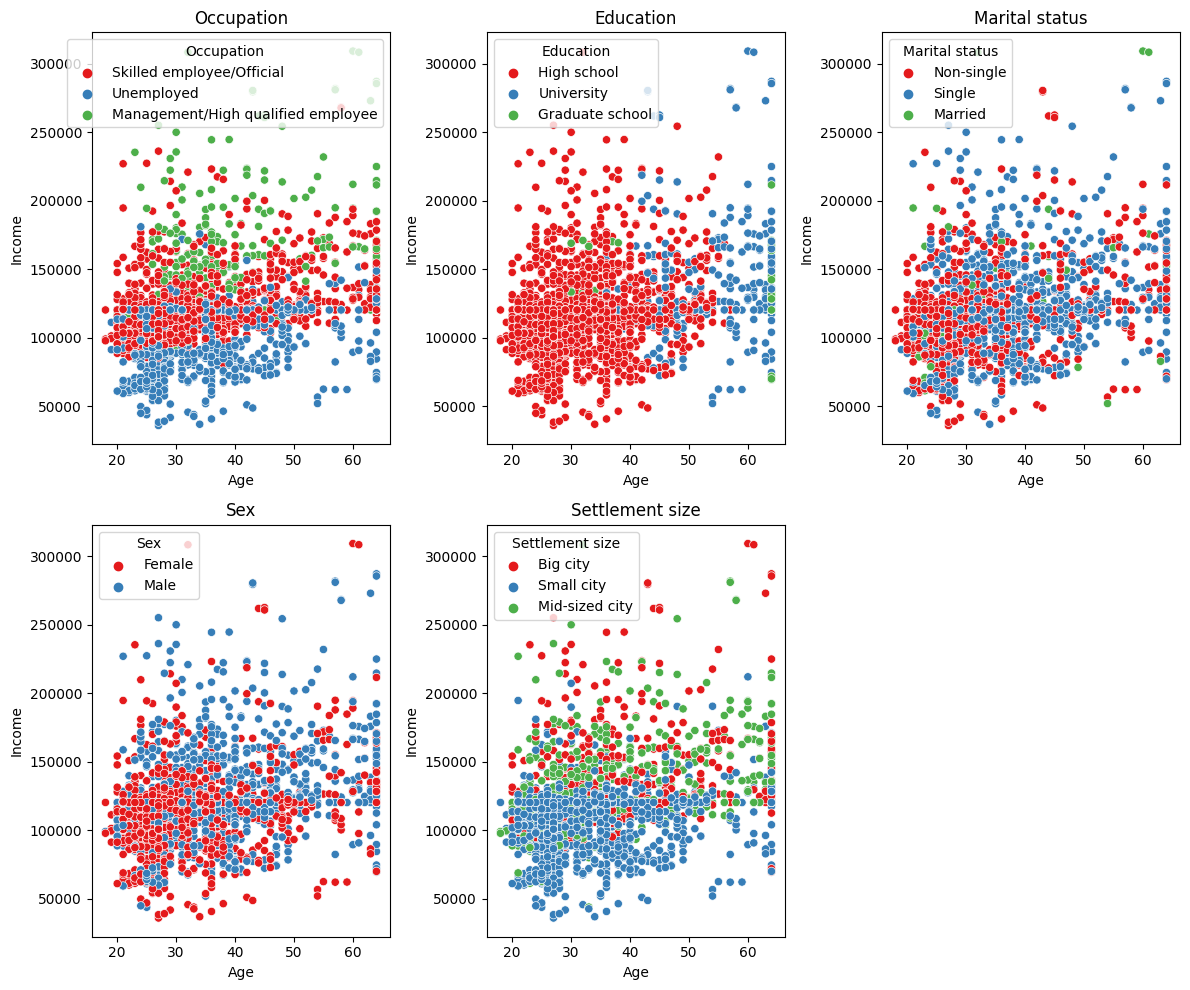

In [51]:
# Set up a 2x3 grid for subplots
fig, axes = plt.subplots(2, 3, figsize=(12, 10))

# Scatter plot with hue='Occupation'
sns.scatterplot(x='Age', y='Income', data=df, hue='Occupation',palette='Set1', ax=axes[0, 0])
axes[0, 0].set_title('Occupation')

# Scatter plot with hue='Education'
sns.scatterplot(x='Age', y='Income', data=df, hue='Education',palette='Set1', ax=axes[0, 1])
axes[0, 1].set_title('Education')

# Scatter plot with hue='Marital Status'
sns.scatterplot(x='Age', y='Income', data=df, hue='Marital status',palette='Set1', ax=axes[0, 2])
axes[0, 2].set_title('Marital status')

# Scatter plot with hue='Sex'
sns.scatterplot(x='Age', y='Income', data=df, hue='Sex',palette='Set1', ax=axes[1, 0])
axes[1, 0].set_title('Sex')

# Scatter plot with hue='Settlement size'
sns.scatterplot(x='Age', y='Income', data=df, hue='Settlement size',palette='Set1', ax=axes[1, 1])
axes[1, 1].set_title('Settlement size')

# Hide the empty subplot in the last row and column
axes[1, 2].axis('off')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1992 entries, 0 to 1991
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Sex              1992 non-null   object 
 1   Marital status   1992 non-null   object 
 2   Age              1992 non-null   float64
 3   Education        1992 non-null   object 
 4   Income           1992 non-null   float64
 5   Occupation       1992 non-null   object 
 6   Settlement size  1992 non-null   object 
dtypes: float64(2), object(5)
memory usage: 109.1+ KB


In our data Marital status and Settlement size can be considered as ordinal data, so it is best for doing label encoding for these columns.
But Sex, Occupation, Education(because it consist 'Unknown') are non-ordinal data so one-hot encoding is best for them. 
Now we are gonna do both encoding for specific columns.

### Normalization


In [53]:
from sklearn.preprocessing import StandardScaler
scaled_df = df.copy(deep=True)
columns_to_scale = ['Age', 'Income']
scaler = StandardScaler()
scaled_df[columns_to_scale]= scaler.fit_transform(df[columns_to_scale])

In [54]:
scaled_df

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,Female,Non-single,-1.233651,High school,8.748596e-01,Skilled employee/Official,Big city
1,Male,Single,1.177961,High school,-8.886392e-01,Unemployed,Small city
2,Male,Single,0.820685,High school,1.470455e+00,Skilled employee/Official,Mid-sized city
3,Male,Single,1.535237,High school,8.249592e-01,Skilled employee/Official,Mid-sized city
4,Male,Single,-0.072504,High school,-5.752095e-07,Unemployed,Small city
...,...,...,...,...,...,...,...
1987,Female,Single,0.999323,High school,9.432883e-02,Unemployed,Small city
1988,Female,Non-single,-0.787056,High school,-7.127041e-02,Skilled employee/Official,Small city
1989,Male,Single,-0.429780,High school,-5.752095e-07,Unemployed,Small city
1990,Female,Non-single,-1.055013,High school,-6.377625e-01,Unemployed,Small city


### Handling Categorical Variables

While occupation, Sex, Education are unordered i prefer to use one-hot encoding. And Marital status and Settlement size are ordered then i use label

In [55]:
# One-Hot Encoding for 'Occupation'
import copy 
data = df.copy(deep=True)
data = pd.concat([data, pd.get_dummies(data['Occupation'], prefix='Occupation', drop_first=True)], axis=1)
data = data.drop(columns=['Occupation'])

# One-Hot Encoding for 'Sex'
data = pd.concat([data, pd.get_dummies(data['Sex'], prefix='Sex', drop_first=True)], axis=1)
data = data.drop(columns=['Sex'])

# One-Hot Encoding for 'Education'
data = pd.concat([data, pd.get_dummies(data['Education'], prefix='Education', drop_first=True)], axis=1)
data = data.drop(columns=['Education'])
data

,Marital status,Age,Income,Settlement size,Occupation_Skilled employee/Official,Occupation_Unemployed,Sex_Male,Education_High school,Education_University
0,Non-single,22.0,150773.0,Big city,1,0,0,1,0
1,Single,49.0,89210.0,Small city,0,1,1,1,0
2,Single,45.0,171565.0,Mid-sized city,1,0,1,1,0
3,Single,53.0,149031.0,Mid-sized city,1,0,1,1,0
4,Single,35.0,120232.0,Small city,0,1,1,1,0
...,...,...,...,...,...,...,...,...,...
1987,Single,47.0,123525.0,Small city,0,1,0,1,0
1988,Non-single,27.0,117744.0,Small city,1,0,0,1,0
1989,Single,31.0,120232.0,Small city,0,1,1,1,0
1990,Non-single,24.0,97968.0,Small city,0,1,0,1,0


In [56]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit_transform(data['Settlement size'])
data['Settlement size Label'] = label_encoder.fit_transform(data['Settlement size'])
data['Marital status Label'] = label_encoder.fit_transform(data['Marital status'])


In [57]:
print(data['Settlement size Label'].value_counts())
print(data['Settlement size'].value_counts())

2    951
1    591
0    450
Name: Settlement size Label, dtype: int64
Small city        951
Mid-sized city    591
Big city          450
Name: Settlement size, dtype: int64


In [58]:
print(data['Marital status Label'].value_counts())
print(data['Marital status'].value_counts())

2    1015
1     899
0      78
Name: Marital status Label, dtype: int64
Single        1015
Non-single     899
Married         78
Name: Marital status, dtype: int64


In [59]:
'''
For Settlement size:
2 -> Small city
1 -> Mid-sized city
0 -> Big city

For Martial status:
2 -> Single
1 -> Non-single
0 -> Married
'''
data['Settlement size'] = data['Settlement size Label']
data = data.drop(columns=['Settlement size Label'])
data['Marital status'] = data['Marital status Label']
data = data.drop(columns=['Marital status Label'])

data

,Marital status,Age,Income,Settlement size,Occupation_Skilled employee/Official,Occupation_Unemployed,Sex_Male,Education_High school,Education_University
0,1,22.0,150773.0,0,1,0,0,1,0
1,2,49.0,89210.0,2,0,1,1,1,0
2,2,45.0,171565.0,1,1,0,1,1,0
3,2,53.0,149031.0,1,1,0,1,1,0
4,2,35.0,120232.0,2,0,1,1,1,0
...,...,...,...,...,...,...,...,...,...
1987,2,47.0,123525.0,2,0,1,0,1,0
1988,1,27.0,117744.0,2,1,0,0,1,0
1989,2,31.0,120232.0,2,0,1,1,1,0
1990,1,24.0,97968.0,2,0,1,0,1,0


<Axes: >

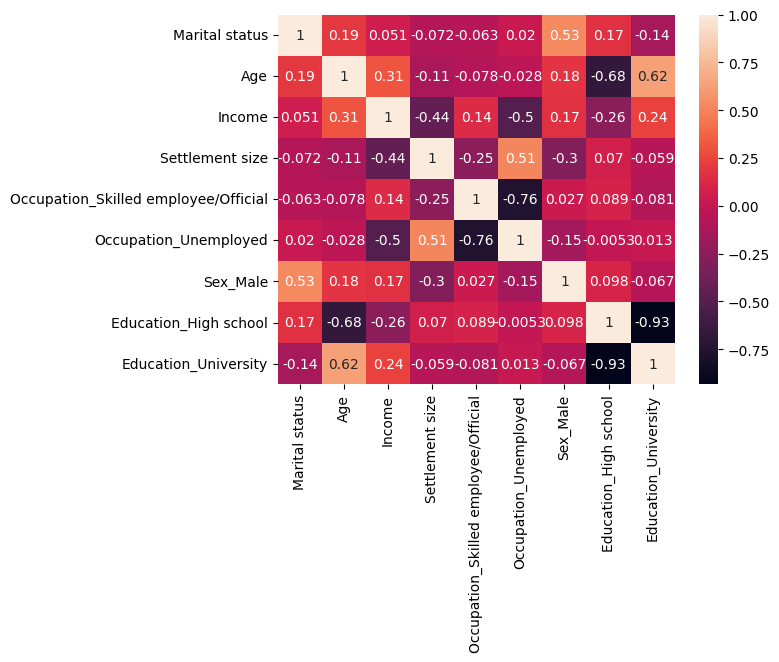

In [60]:
# This shows the columns affect each other values, show the relationships between columns
sns.heatmap(data.corr(), annot=True)

In [61]:
# normalized encoded data
scaled_encoded_data = data.copy(deep=True)
columns_to_scale = ['Age', 'Income']
scaler = StandardScaler()
scaled_encoded_data[columns_to_scale]= scaler.fit_transform(df[columns_to_scale])


Clustering modeling
---

**The Silhouette Score** and Silhouette Plot are used to measure the separation distance between clusters. It ranges from -1 to 1, where a *higher value* indicates better-defined clusters.  

scaled_df-normalization data   
data-encoded   
scaled_encoded_data- both normalized and encoded  

### K-means

##### Modelling with normalized data

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/clus

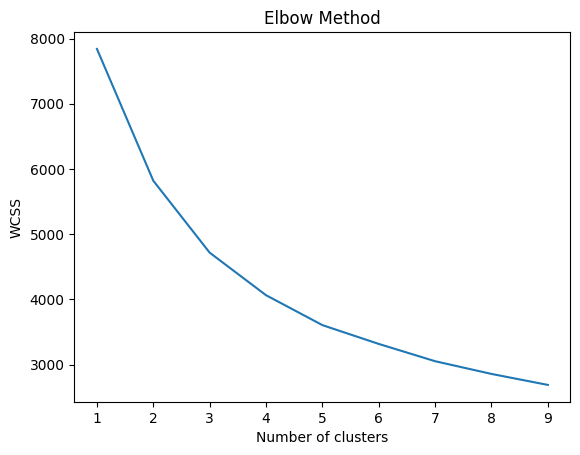

In [62]:
# Using the Elbow Method 
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.cluster import KMeans
wcss = []
silhouette_scores = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, init='random', max_iter=20, n_init='auto', random_state=200, algorithm='auto')
    kmeans.fit(scaled_encoded_data)
    labels = kmeans.labels_
    wcss.append(kmeans.inertia_)
    if i > 1 :
        silhouette_scores.append(silhouette_score(scaled_encoded_data, labels))

plt.plot(range(1, 10), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

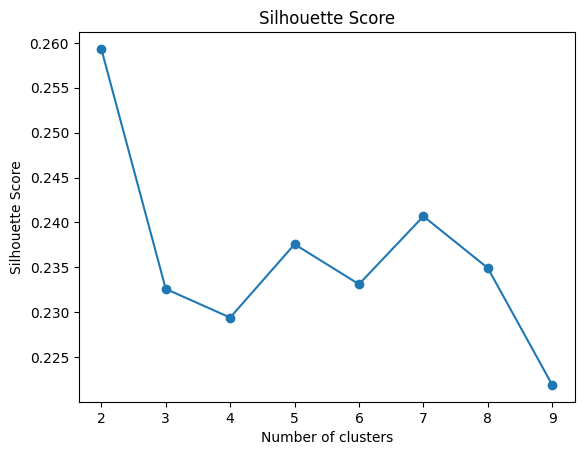

In [63]:
plt.plot(range(2, 10), silhouette_scores, marker='o')
plt.title('Silhouette Score')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

Considering both elbow and silhouette score we see that 5 is best for normalized data

In [64]:
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=204)
clusters_0 = kmeans.fit(scaled_encoded_data)
labels_1 = kmeans.labels_
silhouette = silhouette_score(scaled_encoded_data, labels_1)
print(f"Silhouette Score: {silhouette}")

Silhouette Score: 0.23874554988173513


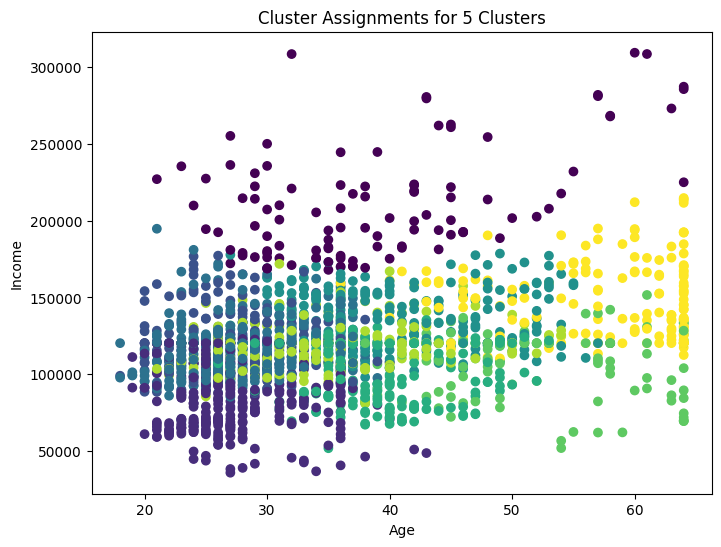

In [65]:
plt.figure(figsize=(8, 6))
plt.scatter(df['Age'], df['Income'], c=labels, cmap='viridis')
plt.title(f'Cluster Assignments for 5 Clusters')
plt.xlabel('Age')
plt.ylabel('Income')
plt.show()

##### Modelling with normal data

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/clus

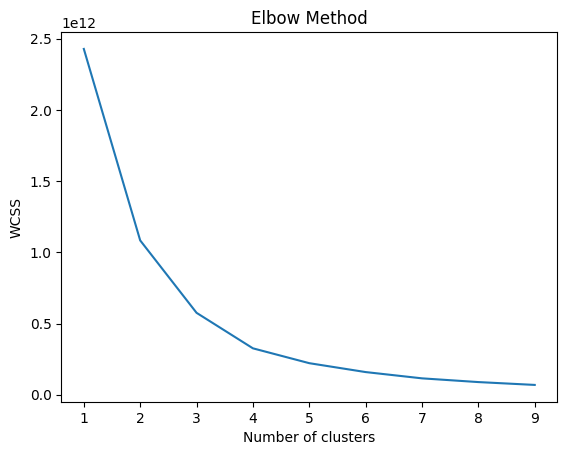

In [66]:
# Using the Elbow Method
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
wcss2 = []
silhouette_scores2 = []
for i in range(1, 10):
    kmeans2 = KMeans(n_clusters=i, init='random', max_iter=20, n_init='auto', random_state=200, algorithm='auto')
    kmeans2.fit(data)
    labels2 = kmeans2.labels_
    wcss2.append(kmeans2.inertia_)
    if i > 1 :
        silhouette_scores2.append(silhouette_score(data, labels2))

plt.plot(range(1, 10), wcss2)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

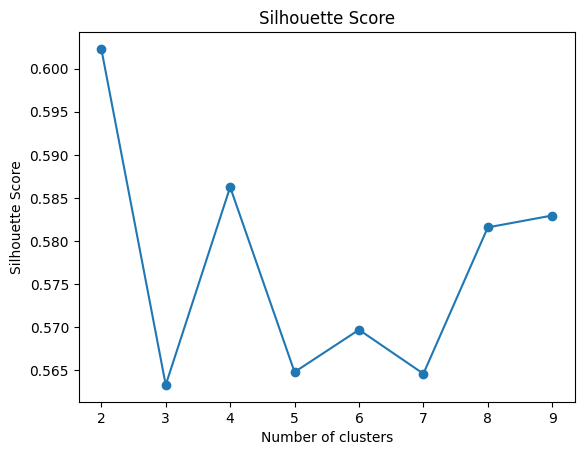

In [67]:
plt.plot(range(2, 10), silhouette_scores2, marker='o')
plt.title('Silhouette Score')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [68]:
kmeans2 = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=204)
clusters2 = kmeans.fit(data)
labels2 = kmeans.labels_
silhouette = silhouette_score(data, labels2)
print(f"Silhouette Score: {silhouette}")

Silhouette Score: 0.5648159945357671


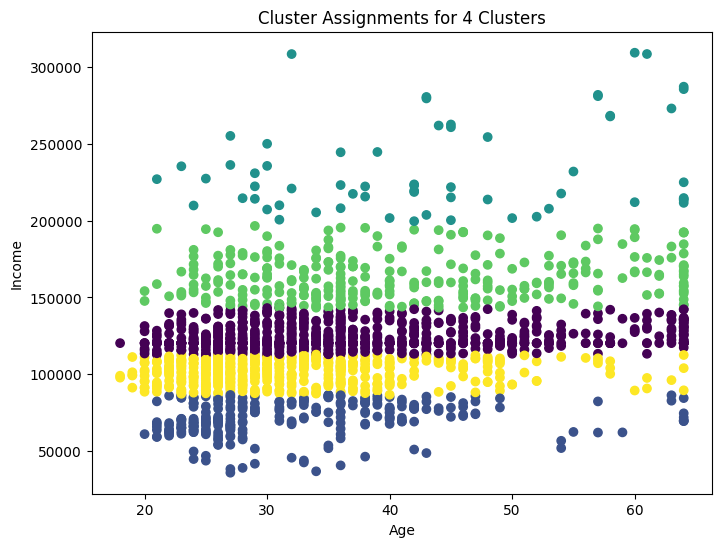

In [69]:
plt.figure(figsize=(8, 6))
plt.scatter(df['Age'], df['Income'], c=labels2, cmap='viridis')
plt.title(f'Cluster Assignments for 4 Clusters')
plt.xlabel('Age')
plt.ylabel('Income')
plt.show()

As we see K-means algorithm only divided clusters based on income.

### K-prototypes

##### Modelling with normalized data

In [77]:
from kmodes.kprototypes import KPrototypes
kproto_array = scaled_df.to_numpy()
costs = []
k_p_ss = []
for i in range(1,10):
    kproto=KPrototypes(n_clusters=i, max_iter=10, random_state=10, verbose=2, n_init=1, init='Huang')
    clusters = kproto.fit_predict(kproto_array, categorical=[0,1,3,5,6])
    costs.append(kproto.cost_)
    labels = kproto.labels_
    if i > 1 :
        k_p_ss.append(silhouette_score(scaled_encoded_data.values, labels))

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/10, moves: 0, ncost: 6047.499999999993
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/10, moves: 265, ncost: 4333.858289638773
Run: 1, iteration: 2/10, moves: 164, ncost: 4218.05621012915
Run: 1, iteration: 3/10, moves: 80, ncost: 4201.68023484399
Run: 1, iteration: 4/10, moves: 24, ncost: 4200.033810040676
Run: 1, iteration: 5/10, moves: 4, ncost: 4199.996020827018
Run: 1, iteration: 6/10, moves: 1, ncost: 4199.993161379123
Run: 1, iteration: 7/10, moves: 0, ncost: 4199.993161379123
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/10, moves: 417, ncost: 3610.3651473580057
Run: 1, iteration: 2/10, moves: 180, ncost: 3553.1249080295242
Run: 1, iteration: 3/10, moves: 112, ncost: 3530.2115128491846
Run: 1, iteration: 4/10, moves: 79, ncost: 3522.5276532784274
Run: 1, iteration: 5/10, 

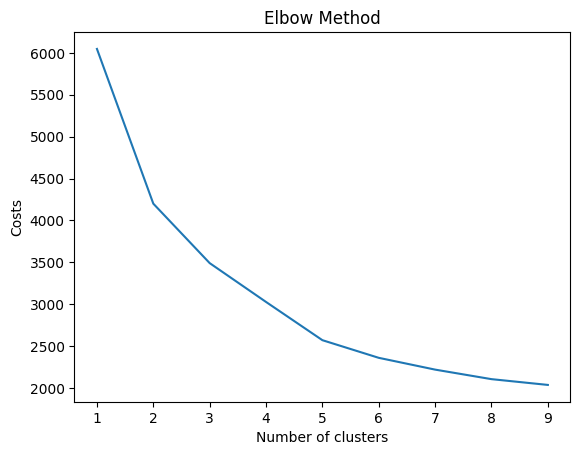

In [78]:
plt.plot(range(1, 10), costs)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Costs')
plt.show()

Text(0, 0.5, 'Silhouette Score')

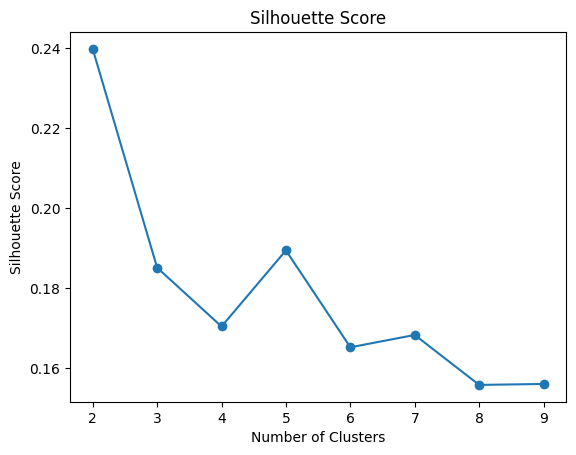

In [79]:
# Plot Silhouette Score
plt.plot(range(2, 10), k_p_ss, marker='o')
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')

Considering 2 graph we can choose best cluster value as 5. So lets construct the algorithm for 5 clusters again

In [80]:
kproto=KPrototypes(n_clusters=5, max_iter=20, verbose=2, init='Huang')
clusters = kproto.fit_predict(kproto_array, categorical=[0,1,3,5,6])

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/20, moves: 645, ncost: 2696.074083061113
Run: 1, iteration: 2/20, moves: 233, ncost: 2644.7979511904923
Run: 1, iteration: 3/20, moves: 113, ncost: 2631.0165404579843
Run: 1, iteration: 4/20, moves: 60, ncost: 2619.128704167819
Run: 1, iteration: 5/20, moves: 50, ncost: 2611.261670230566
Run: 1, iteration: 6/20, moves: 38, ncost: 2607.327196520643
Run: 1, iteration: 7/20, moves: 9, ncost: 2607.2227732336614
Run: 1, iteration: 8/20, moves: 0, ncost: 2607.2227732336614
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/20, moves: 478, ncost: 2936.2764606995192
Run: 2, iteration: 2/20, moves: 214, ncost: 2878.3173886876107
Run: 2, iteration: 3/20, moves: 131, ncost: 2836.5424227611707
Run: 2, iteration: 4/20, moves: 139, ncost: 2756.2663668377622
Run: 2, iteration: 5/20, moves: 97, nc

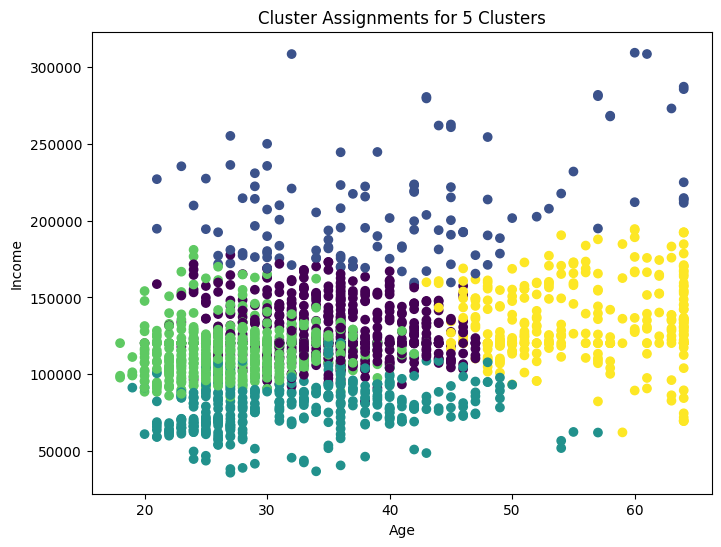

In [81]:
plt.figure(figsize=(8, 6))
plt.scatter(df['Age'], df['Income'], c=clusters, cmap='viridis')
plt.title(f'Cluster Assignments for 5 Clusters')
plt.xlabel('Age')
plt.ylabel('Income')
plt.show()

In [83]:
labels_2 = kproto.labels_
silhouette = silhouette_score(scaled_encoded_data.values, labels_2)

print(f"Silhouette Score: {silhouette}")

Silhouette Score: 0.19005805539652504


##### Modelling with normal data

In [84]:
from kmodes.kprototypes import KPrototypes
kproto_array = df.to_numpy()
costs = []
k_p_ss = []
for i in range(1,10):
    kproto=KPrototypes(n_clusters=i, max_iter=10, random_state=10, verbose=2, n_init=1, init='Huang')
    clusters = kproto.fit_predict(kproto_array, categorical=[0,1,3,5,6])
    costs.append(kproto.cost_)
    labels = kproto.labels_
    if i > 1 :
        k_p_ss.append(silhouette_score(data.values, labels))


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/10, moves: 0, ncost: 2427644365749.8037
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/10, moves: 142, ncost: 1100334943940.37
Run: 1, iteration: 2/10, moves: 73, ncost: 1087368707011.8746
Run: 1, iteration: 3/10, moves: 40, ncost: 1083713899662.2689
Run: 1, iteration: 4/10, moves: 8, ncost: 1083532816816.657
Run: 1, iteration: 5/10, moves: 2, ncost: 1083520480584.0607
Run: 1, iteration: 6/10, moves: 0, ncost: 1083520480584.0607
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/10, moves: 596, ncost: 681042658884.3759
Run: 1, iteration: 2/10, moves: 242, ncost: 595333322726.5001
Run: 1, iteration: 3/10, moves: 96, ncost: 580055637376.802
Run: 1, iteration: 4/10, moves: 55, ncost: 576532539621.6687
Run: 1, iteration: 5/10, moves: 23, ncost: 576014921508.5411
Run: 1, iteration: 6/10, m

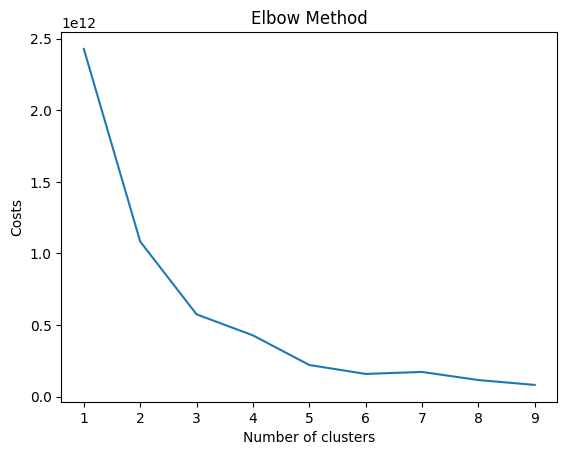

In [85]:
plt.plot(range(1, 10), costs)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Costs')
plt.show()

Text(0, 0.5, 'Silhouette Score')

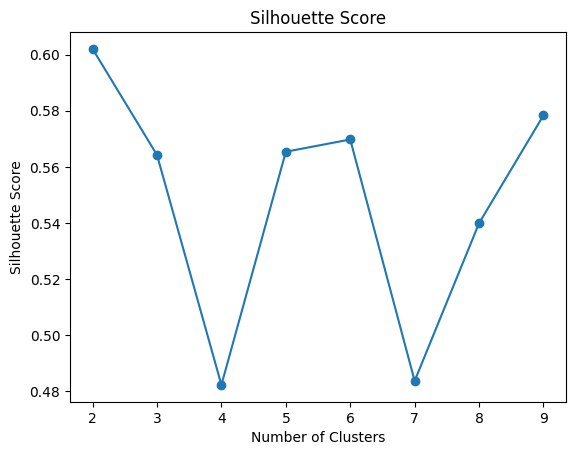

In [86]:
# Plot Silhouette Score
plt.plot(range(2, 10), k_p_ss, marker='o')
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')

In [87]:
kproto=KPrototypes(n_clusters=5, max_iter=20, verbose=2, init='Huang')
clusters = kproto.fit_predict(kproto_array, categorical=[0,1,3,5,6])


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/20, moves: 374, ncost: 434226472048.05853
Run: 1, iteration: 2/20, moves: 188, ncost: 400497435116.17804
Run: 1, iteration: 3/20, moves: 88, ncost: 389972294740.7494
Run: 1, iteration: 4/20, moves: 206, ncost: 355784991674.7853
Run: 1, iteration: 5/20, moves: 358, ncost: 299894372229.9235
Run: 1, iteration: 6/20, moves: 207, ncost: 257222362049.09552
Run: 1, iteration: 7/20, moves: 162, ncost: 235751067598.78595
Run: 1, iteration: 8/20, moves: 119, ncost: 229299577157.38162
Run: 1, iteration: 9/20, moves: 64, ncost: 226901362435.08493
Run: 1, iteration: 10/20, moves: 45, ncost: 225569806558.18997
Run: 1, iteration: 11/20, moves: 31, ncost: 224122970262.6546
Run: 1, iteration: 12/20, moves: 26, ncost: 221864846857.61475
Run: 1, iteration: 13/20, moves: 11, ncost: 221703915567.3964
Run: 1, iteration: 14/20, moves: 4, ncost: 221696535800.2309
Run: 1, iteration: 15/20, moves: 1, ncost: 2216

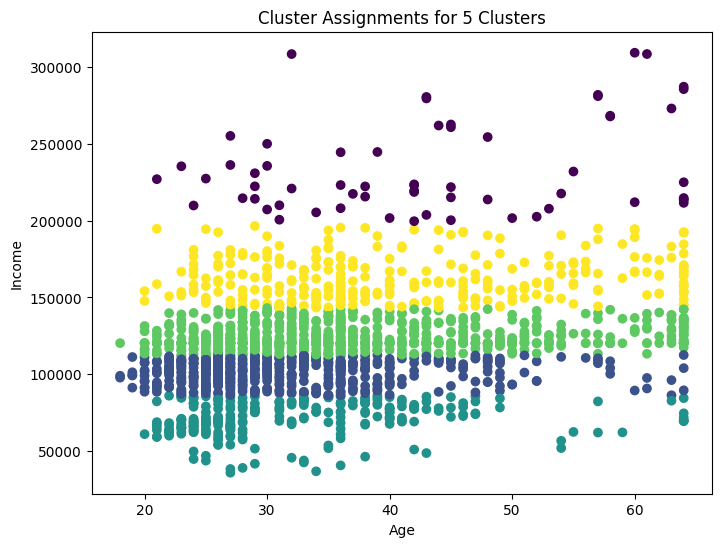

In [88]:
plt.figure(figsize=(8, 6))
plt.scatter(df['Age'], df['Income'], c=clusters, cmap='viridis')
plt.title(f'Cluster Assignments for 5 Clusters')
plt.xlabel('Age')
plt.ylabel('Income')
plt.show()

In [90]:
labels_2 = kproto.labels_
silhouette = silhouette_score(data.values, labels_2)

print(f"Silhouette Score: {silhouette}")

Silhouette Score: 0.5653179904886042


### Agglomerative hierarchical clustering with gower distance 

##### Modelling with normalized data

In [92]:
import gower
from sklearn.cluster import AgglomerativeClustering
distance_matrix = gower.gower_matrix(scaled_df)
distance_matrix

array([[0.        , 0.68743193, 0.510859  , ..., 0.6153295 , 0.31950384,
        0.6237578 ],
       [0.68743193, 0.        , 0.34114808, ..., 0.07210243, 0.36792806,
        0.08539421],
       [0.510859  , 0.34114808, 0.        , ..., 0.35600215, 0.67508334,
        0.40169755],
       ...,
       [0.6153295 , 0.07210243, 0.35600215, ..., 0.        , 0.3190812 ,
        0.04569541],
       [0.31950384, 0.36792806, 0.67508334, ..., 0.3190812 , 0.        ,
        0.30425397],
       [0.6237578 , 0.08539421, 0.40169755, ..., 0.04569541, 0.30425397,
        0.        ]], dtype=float32)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/cluster/hierarchy.py:834: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')


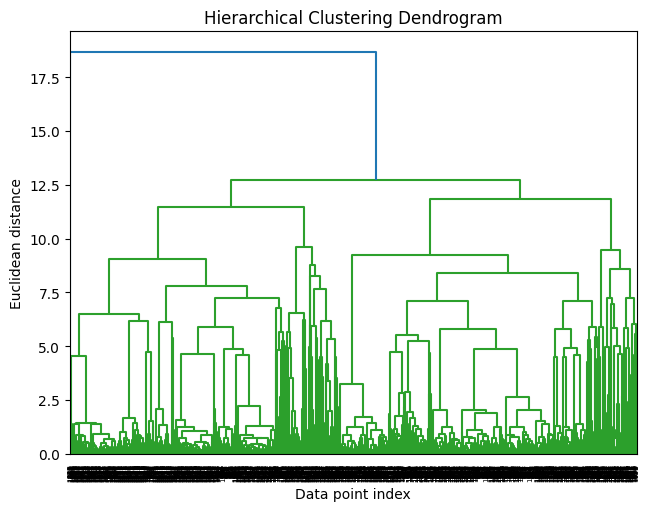

In [93]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist
clustering = AgglomerativeClustering(distance_threshold=0,n_clusters=None)
clustering.fit(distance_matrix)

row_clusters = linkage(pdist(distance_matrix, metric='euclidean'), method='average')
pd.DataFrame(row_clusters,
             columns=['row label 1', 'row label 2',
                      'distance', 'no. of items in clust.'],
            index=[f'cluster {(i + 1)}'
                    for i in range(row_clusters.shape[0])])

row_dendr = dendrogram(row_clusters)
plt.tight_layout()
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data point index')
plt.ylabel('Euclidean distance')
plt.show()

In [94]:
# Function to perform hierarchical clustering and calculate silhouette score
def hierarchical_clustering_silhouette(X, n_clusters):
    # Perform hierarchical clustering
    clustering = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='ward')
    labels = clustering.fit_predict(X)
    
    # Calculate silhouette score
    silhouette_avg = silhouette_score(X, labels)
    
    return silhouette_avg

silhouette_scores = []

for n_clusters in range(2, 10):
    silhouette_avg = hierarchical_clustering_silhouette(distance_matrix, n_clusters)
    silhouette_scores.append(silhouette_avg)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/cluster/hierarchy.py:834: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/cluster/hierarchy.py:834: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation mat

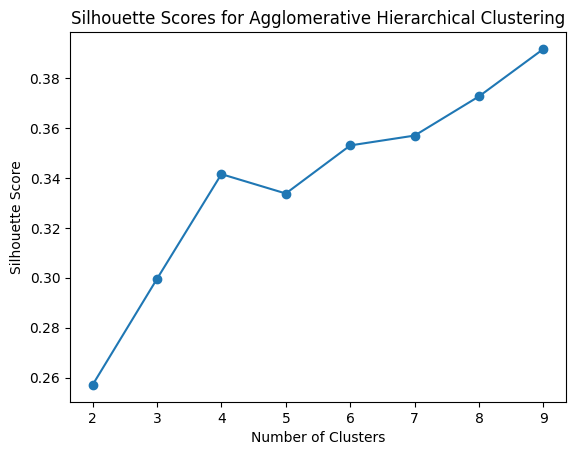

In [95]:
# Plot the results
plt.plot(range(2, 10), silhouette_scores, marker='o')
plt.title('Silhouette Scores for Agglomerative Hierarchical Clustering')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [96]:
# we can choose 4
model = AgglomerativeClustering(n_clusters=4, linkage='ward', affinity='euclidean')
clusters = model.fit_predict(distance_matrix)
silhouette = silhouette_score(distance_matrix, clusters)
silhouette

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/cluster/hierarchy.py:834: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')


0.34147194

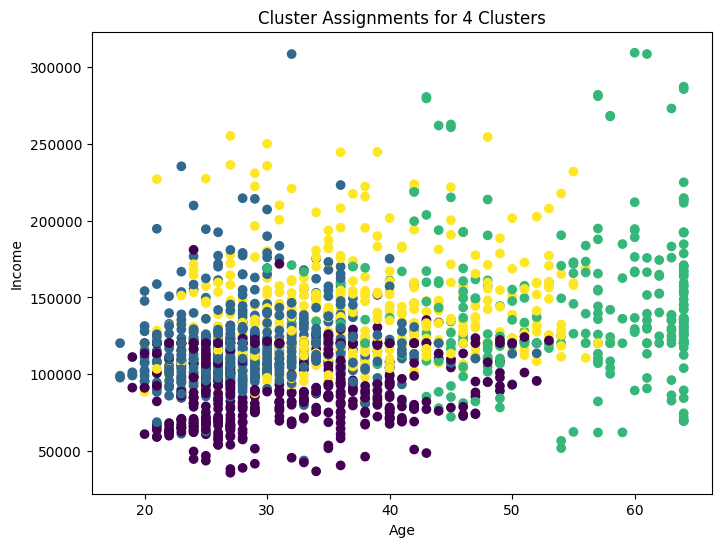

In [97]:
plt.figure(figsize=(8, 6))
plt.scatter(df['Age'], df['Income'], c=clusters, cmap='viridis')
plt.title(f'Cluster Assignments for 4 Clusters')
plt.xlabel('Age')
plt.ylabel('Income')
plt.show()

##### Modelling with normal data

In [98]:
distance_matrix = gower.gower_matrix(df)
distance_matrix

clustering = AgglomerativeClustering(distance_threshold=0,n_clusters=None)
clustering.fit(distance_matrix)

row_clusters = linkage(pdist(distance_matrix, metric='euclidean'), method='average')
pd.DataFrame(row_clusters,
             columns=['row label 1', 'row label 2',
                      'distance', 'no. of items in clust.'],
            index=[f'cluster {(i + 1)}'
                    for i in range(row_clusters.shape[0])])

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/cluster/hierarchy.py:834: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')


,row label 1,row label 2,distance,no. of items in clust.
cluster 1,4.0,255.0,0.000000,2.0
cluster 2,1098.0,1205.0,0.000000,2.0
cluster 3,101.0,339.0,0.000000,2.0
cluster 4,1409.0,1994.0,0.000000,3.0
cluster 5,1498.0,1995.0,0.000000,4.0
...,...,...,...,...
cluster 1987,3961.0,3974.0,9.609201,187.0
cluster 1988,3975.0,3978.0,11.445078,948.0
cluster 1989,3976.0,3977.0,11.844540,1042.0
cluster 1990,3979.0,3980.0,12.730995,1990.0


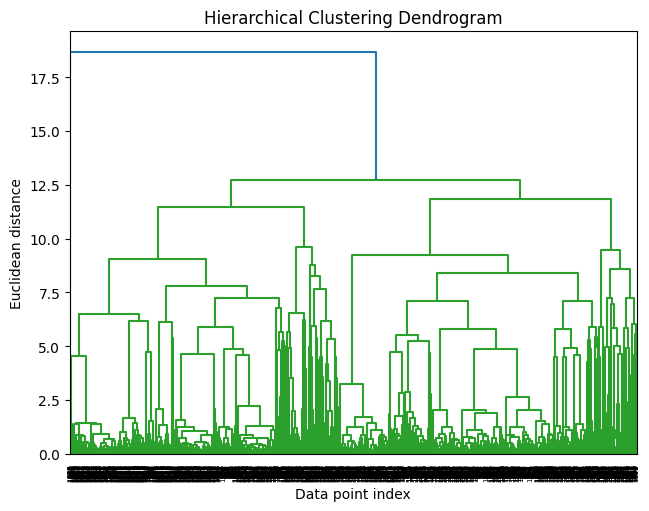

In [99]:
row_dendr = dendrogram(row_clusters)
plt.tight_layout()
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data point index')
plt.ylabel('Euclidean distance')
plt.show()


In [100]:
# Function to perform hierarchical clustering and calculate silhouette score
def hierarchical_clustering_silhouette(X, n_clusters):
    # Perform hierarchical clustering
    clustering = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='ward')
    labels = clustering.fit_predict(X)
    
    # Calculate silhouette score
    silhouette_avg = silhouette_score(X, labels)
    
    return silhouette_avg

silhouette_scores = []

for n_clusters in range(2, 10):
    silhouette_avg = hierarchical_clustering_silhouette(distance_matrix, n_clusters)
    silhouette_scores.append(silhouette_avg)


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/cluster/hierarchy.py:834: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/cluster/hierarchy.py:834: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation mat

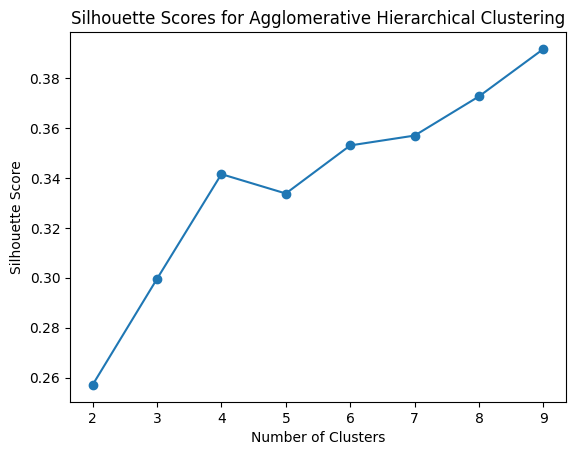

In [101]:
# Plot the results
plt.plot(range(2, 10), silhouette_scores, marker='o')
plt.title('Silhouette Scores for Agglomerative Hierarchical Clustering')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()


In [102]:
# we can choose 4
model = AgglomerativeClustering(n_clusters=4, linkage='ward', affinity='euclidean')
clusters = model.fit_predict(distance_matrix)
silhouette = silhouette_score(distance_matrix, clusters)
silhouette


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/cluster/hierarchy.py:834: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')


0.34147194

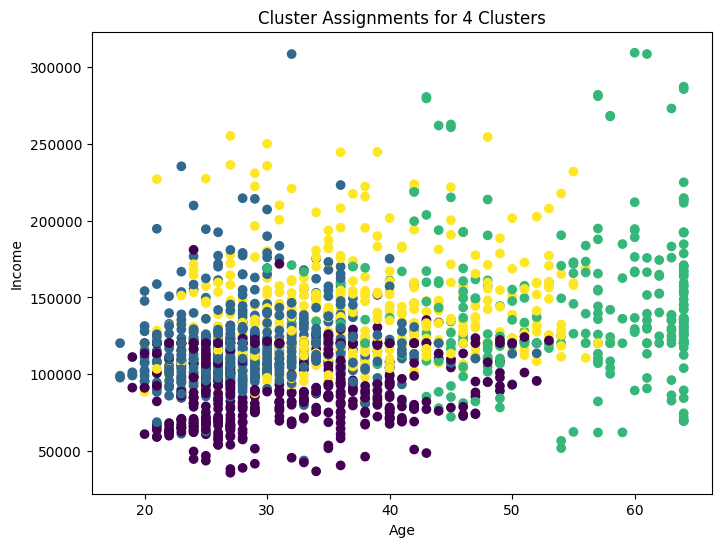

In [103]:
plt.figure(figsize=(8, 6))
plt.scatter(df['Age'], df['Income'], c=clusters, cmap='viridis')
plt.title(f'Cluster Assignments for 4 Clusters')
plt.xlabel('Age')
plt.ylabel('Income')
plt.show()

Note: i have done plenty runs for finding why my silhouette scores is low and i find that when i don't do normalization with standart scale then the score become around 0.5 but when i do standart scale then maximum value of silhouette score become 0.34 

Final
---

We choose as agglomerative hierarchical clustering as best method for it's silhouette score and the cluster size will be 4, lets analyze the data to see anything interesting that cluster division

In [ ]:
cluster_dict = []
for i in clusters:
    cluster_dict.append(i)

In [ ]:
df['Cluster'] = cluster_dict

In [ ]:
df.head(10)

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Cluster
0,Female,Non-single,22.0,High school,150773.0,Skilled employee/Official,Big city,1
1,Male,Single,49.0,High school,89210.0,Unemployed,Small city,0
2,Male,Single,45.0,High school,171565.0,Skilled employee/Official,Mid-sized city,3
3,Male,Single,53.0,High school,149031.0,Skilled employee/Official,Mid-sized city,3
4,Male,Single,35.0,High school,120232.0,Unemployed,Small city,0
5,Male,Single,53.0,High school,156495.0,Skilled employee/Official,Mid-sized city,3
6,Male,Single,35.0,High school,193621.0,Management/High qualified employee,Mid-sized city,3
7,Male,Non-single,61.0,University,151591.0,Unemployed,Small city,2
8,Male,Non-single,28.0,High school,120232.0,Management/High qualified employee,Mid-sized city,1
9,Female,Non-single,25.0,High school,108469.0,Skilled employee/Official,Small city,1


In [ ]:
print(df[df['Cluster'] == 0]['Sex'].value_counts())

Female    264
Male      205
Name: Sex, dtype: int64


In [ ]:
column_names = df.select_dtypes(include='object').columns
column_names

Index(['Sex', 'Marital status', 'Education', 'Occupation', 'Settlement size'], dtype='object')

In [ ]:
for j in range(4):
    print(f'Cluster {j}')
    avg_age = df[df['Cluster'] == j]['Age'].mean()
    avg_inc = df[df['Cluster'] == j]['Income'].mean()
    print(f'Average Age of Cluster {j}: {avg_age}')
    print(f'Average Income of Cluster {j}: {avg_inc}')
    for i in column_names:
        print(df[df['Cluster'] == j][i].value_counts())
    print('\n')

Cluster 0
Average Age of Cluster 0: 32.11300639658849
Average Income of Cluster 0: 90050.09381663112
Female    264
Male      205
Name: Sex, dtype: int64
Single        268
Non-single    187
Married        14
Name: Marital status, dtype: int64
High school    469
Name: Education, dtype: int64
Unemployed    469
Name: Occupation, dtype: int64
Small city    469
Name: Settlement size, dtype: int64


Cluster 1
Average Age of Cluster 1: 28.8992
Average Income of Cluster 1: 118997.2848
Female    465
Male      160
Name: Sex, dtype: int64
Non-single    511
Single         69
Married        45
Name: Marital status, dtype: int64
High school        623
Graduate school      2
Name: Education, dtype: int64
Skilled employee/Official             540
Management/High qualified employee     54
Unemployed                             31
Name: Occupation, dtype: int64
Mid-sized city    260
Small city        247
Big city          118
Name: Settlement size, dtype: int64


Cluster 2
Average Age of Cluster 2: 53.18

As we observe in Cluster 0, individuals who are approximately 30 years old, have an income of $90,050, are unemployed, reside in a small city, and possess a high school education.  
In Cluster 1, individuals are predominantly female, around 28 years old, with an income of $120,000. They are skilled employees or highly qualified and often have relationships.  
In Cluster 2, individuals are typically around 54 years old, with an average income of $141,000. They have university education and are mostly employed as skilled workers or are unemployed.  
In Cluster 3, individuals are typically males, approximately 36 years old, with an average income of $135,000. They are predominantly employed in skilled or management occupations, reside in big or mid-sized cities, and have a high school education.  
Conclusion: females can achive same results as men with a relationship but male have to be single   